# Northern Patagonia Load
## Curve fitting
### Paul Sandoval Quilodrán 
#### https://github.com/SQPaul/NPLoad - paul.sandoval97@gmail.com

### import packages

In [1]:
import glob

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import scipy.stats
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

# 1.- Calculate correlation
### Calculate pearson, spearman and kendall tau correlations and its statistical significance ($\alpha$)

In [21]:
path = glob.glob('/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Timeseries/*c.csv')

all_c = []
all_q = []
all_stations = []
all_param_names = []
all_corr_names = []
all_corr = []
all_alpha = []
all_len_data = []

for i in range(len(path)):
    station = pd.read_csv(path[i],index_col='date')
    #Calculate correlation and significance
    ##Create some useful lists and variables
    station_name = path[i][73:-11]
    param_names = station.columns[1:].to_list()
    ##start calculation
    for x in range(station.shape[1]-1):
        param_act = station.columns[x+1] 
        if station.iloc[:,0].isna().any() == True:
            #print('no streamflow data')
            None
        ##In case of nan in the column    
        elif station.iloc[:,x+1].isna().any() == True:
            selected_act = []
            for y in range(station.shape[0]):
                if str(station.iloc[y,x+1]) != 'nan':
                    selected_act.append(y)
            station = station.iloc[selected_act]
            r = scipy.stats.pearsonr(station.iloc[:,0], station.iloc[:,x+1])
            s = scipy.stats.spearmanr(station.iloc[:,0], station.iloc[:,x+1])
            k = scipy.stats.kendalltau(station.iloc[:,0], station.iloc[:,x+1])
            ### show just signifant corrlations
            if r[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('pearson')
                all_corr.append(r[0])
                all_alpha.append(r[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"r",r[0],r[1])
            elif s[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('spearman')
                all_corr.append(s[0])
                all_alpha.append(s[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"s",s[0],s[1])
            elif k[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('kendall-tau')
                all_corr.append(k[0])
                all_alpha.append(k[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"k",k[0],k[1])
        else:
            r = scipy.stats.pearsonr(station.iloc[:,0], station.iloc[:,x+1])
            s = scipy.stats.spearmanr(station.iloc[:,0], station.iloc[:,x+1])
            k = scipy.stats.kendalltau(station.iloc[:,0], station.iloc[:,x+1])
            ### show just signifant corrlations
            if r[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('pearson')
                all_corr.append(r[0])
                all_alpha.append(r[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"r",r[0],r[1])
            elif s[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('spearman')
                all_corr.append(s[0])
                all_alpha.append(s[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"s",s[0],s[1])
            elif k[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('kendall-tau')
                all_corr.append(k[0])
                all_alpha.append(k[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"k",k[0],k[1])

corr_summary = pd.DataFrame(all_param_names,all_stations)
corr_summary.columns = ['Parámetro']
corr_summary['Correlación'] = all_corr_names
corr_summary['Valor'] = all_corr
corr_summary['p-value'] = all_alpha
corr_summary['Cantidad de datos'] = all_len_data
corr_summary.index.name = 'Cuenca'

#corr_summary.to_csv('/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Results/Resumen_correlaciones.csv')

# 2.- Calculate function between Q (streamflow) and C (concentration)
### Function calculation for the significan correlations

## 2.1.- Visual inspection

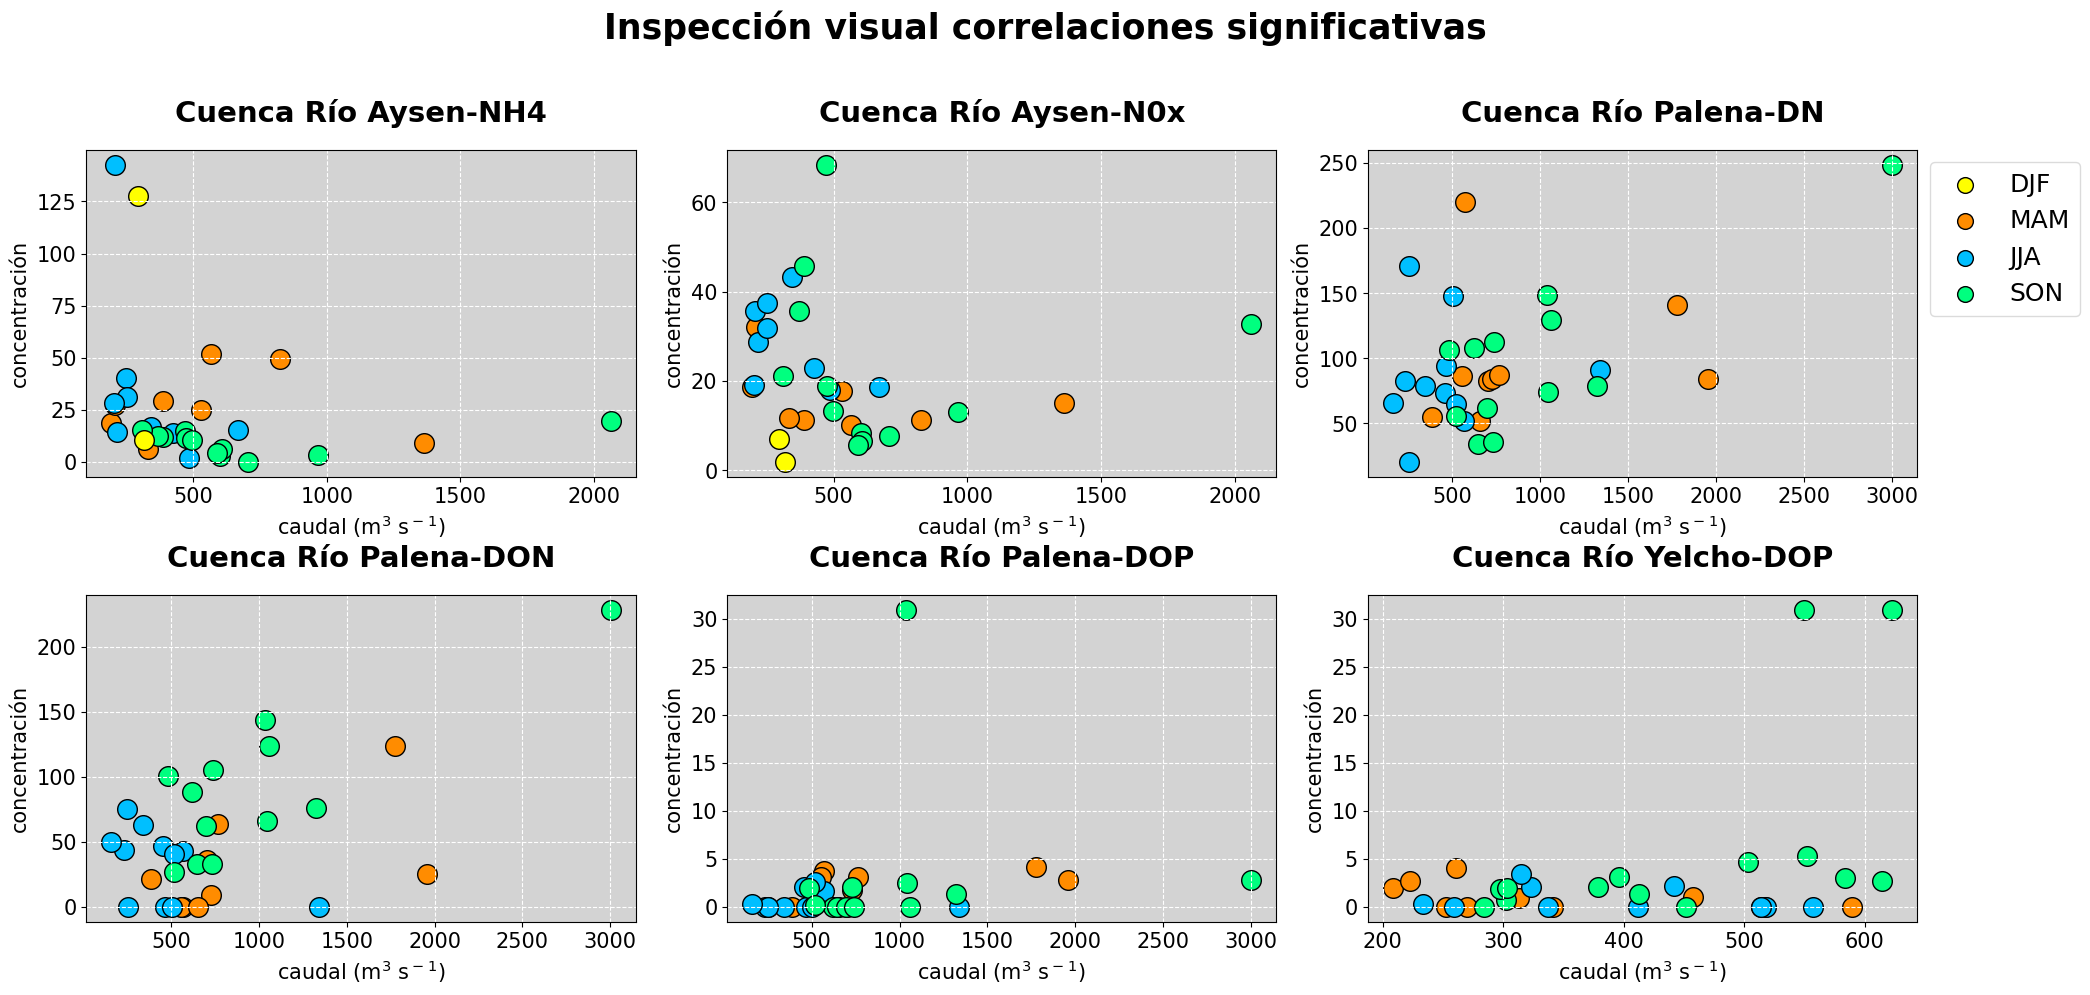

In [137]:
season_name = ['DJF','MAM','JJA','SON']

colors = ['yellow','darkorange','deepskyblue','springgreen','cyan','crimson','mediumorchid','greenyellow','teal','yellow','deeppink','tomato','blue','dimgray']

markers = ['^','8','v','^','>','<','8','s','X','d','P']

# Define subplots dimensions
fig = plt.figure(figsize=(21,14))
axx = [fig.add_subplot(331),fig.add_subplot(332),fig.add_subplot(333),
       fig.add_subplot(334),fig.add_subplot(335),fig.add_subplot(336)]

for i in range(corr_summary.shape[0]):
    # print(corr_summary.index[i],corr_summary.Correlación[i],corr_summary.Parámetro[i])
    # plt.scatter(all_q[i],all_c[i])
    # plt.show()
    for x in range(len(all_c[i])):
        if pd.to_datetime(all_c[i].index[x]).month == 12 or pd.to_datetime(all_c[i].index[x]).month == 1 or pd.to_datetime(all_c[i].index[x]).month == 2: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[0],label= season_name[0])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 3 or pd.to_datetime(all_c[i].index[x]).month == 4 or pd.to_datetime(all_c[i].index[x]).month == 5: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[1],label= season_name[1])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 6 or pd.to_datetime(all_c[i].index[x]).month == 7 or pd.to_datetime(all_c[i].index[x]).month == 8: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[2],label= season_name[2])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 9 or pd.to_datetime(all_c[i].index[x]).month == 10 or pd.to_datetime(all_c[i].index[x]).month == 11: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[3],label= season_name[3])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")

    #Label
    axx[i].set_ylabel("concentración",labelpad=5,fontsize=15)
    axx[i].set_xlabel("caudal (m$^3$ s$^-$$^1$)",labelpad=5,fontsize=15)

    #Configuration
    axx[i].set_facecolor("lightgray")
    axx[i].grid(ls="--",color="white")

    #Title
    title_name = 'Cuenca Río '+str(corr_summary.index[i])+'-'+str(corr_summary.Parámetro[i])
    axx[i].set_title(title_name,fontsize=21,pad=20,fontweight="bold")

    axx[i].tick_params(axis='y', rotation=0, labelsize=15)
    axx[i].tick_params(axis='x', rotation=0, labelsize=15)

    #Adjust the label size in the legend (to avoid superposition)
#        if i == 0:
#            handles, labels = axx[i].get_legend_handles_labels()
#            legend = axx[i].legend(handles, labels, markerscale=0.6, loc='upper left',framealpha=0.4,bbox_to_anchor=(1.4, 1))  # Puedes ajustar el valor de markerscale según sea necesario

    #axx[i].set_xlim(min(sim.iloc[i,:].min(),obs.iloc[i,:].min())-0.1,max(sim.iloc[i,:].max(),obs.iloc[i,:].max())+0.1)
    #axx[i].set_ylim(min(sim.iloc[i,:].min(),obs.iloc[i,:].min())-0.1,max(sim.iloc[i,:].max(),obs.iloc[i,:].max())+0.1)



handles, labels = axx[0].get_legend_handles_labels()
legend = axx[2].legend([handles[0],handles[1],handles[9],handles[18]], [labels[0],labels[1],labels[9],labels[18]], markerscale=0.8, loc='upper left',
                       framealpha=0.7,bbox_to_anchor=(1, 1), prop={'size': 18}) 

        
fig.set_facecolor("white")

#General configuration
plt.tight_layout()
fig.subplots_adjust(top=0.88)

fig.suptitle("Inspección visual correlaciones significativas",fontsize=25,fontweight="bold")
            
figname = '/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Figures/inspección_visual_v0.png'
#fig.savefig(str(figname),dpi=400)
plt.show()
    

## 2.2.- Curve fitting

### new summary

In [2]:
path = glob.glob('/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Timeseries/mod/*')

all_c = []
all_q = []
all_stations = []
all_param_names = []
all_corr_names = []
all_corr = []
all_alpha = []
all_len_data = []

for i in range(len(path)):
    station = pd.read_csv(path[i],index_col='date')
    #Calculate correlation and significance
    ##Create some useful lists and variables
    station_name = path[i][77:-11]
    param_names = station.columns[1:].to_list()
    ##start calculation
    for x in range(station.shape[1]-1):
        param_act = station.columns[x+1] 
        if station.iloc[:,0].isna().any() == True:
            #print('no streamflow data')
            None
        ##In case of nan in the column    
        elif station.iloc[:,x+1].isna().any() == True:
            selected_act = []
            for y in range(station.shape[0]):
                if str(station.iloc[y,x+1]) != 'nan':
                    selected_act.append(y)
            station = station.iloc[selected_act]
            r = scipy.stats.pearsonr(station.iloc[:,0], station.iloc[:,x+1])
            s = scipy.stats.spearmanr(station.iloc[:,0], station.iloc[:,x+1])
            k = scipy.stats.kendalltau(station.iloc[:,0], station.iloc[:,x+1])
            ### show just signifant corrlations
            if r[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('pearson')
                all_corr.append(r[0])
                all_alpha.append(r[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"r",r[0],r[1])
            elif s[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('spearman')
                all_corr.append(s[0])
                all_alpha.append(s[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"s",s[0],s[1])
            elif k[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('kendall-tau')
                all_corr.append(k[0])
                all_alpha.append(k[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"k",k[0],k[1])
        else:
            r = scipy.stats.pearsonr(station.iloc[:,0], station.iloc[:,x+1])
            s = scipy.stats.spearmanr(station.iloc[:,0], station.iloc[:,x+1])
            k = scipy.stats.kendalltau(station.iloc[:,0], station.iloc[:,x+1])
            ### show just signifant corrlations
            if r[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('pearson')
                all_corr.append(r[0])
                all_alpha.append(r[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"r",r[0],r[1])
            elif s[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('spearman')
                all_corr.append(s[0])
                all_alpha.append(s[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"s",s[0],s[1])
            elif k[1] < 0.05:
                all_stations.append(station_name)
                all_param_names.append(param_act)
                all_corr_names.append('kendall-tau')
                all_corr.append(k[0])
                all_alpha.append(k[1])
                all_c.append(station.iloc[:,x+1])
                all_q.append(station.iloc[:,0])
                all_len_data.append(len(station.iloc[:,x+1]))
                #print(station_name,param_act,"k",k[0],k[1])

corr_summary = pd.DataFrame(all_param_names,all_stations)
corr_summary.columns = ['Parámetro']
corr_summary['Correlación'] = all_corr_names
corr_summary['Valor'] = all_corr
corr_summary['p-value'] = all_alpha
corr_summary['Cantidad de datos'] = all_len_data
corr_summary.index.name = 'Cuenca'

#corr_summary.to_csv('/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Results/Resumen_correlaciones_mod.csv')

### New plot

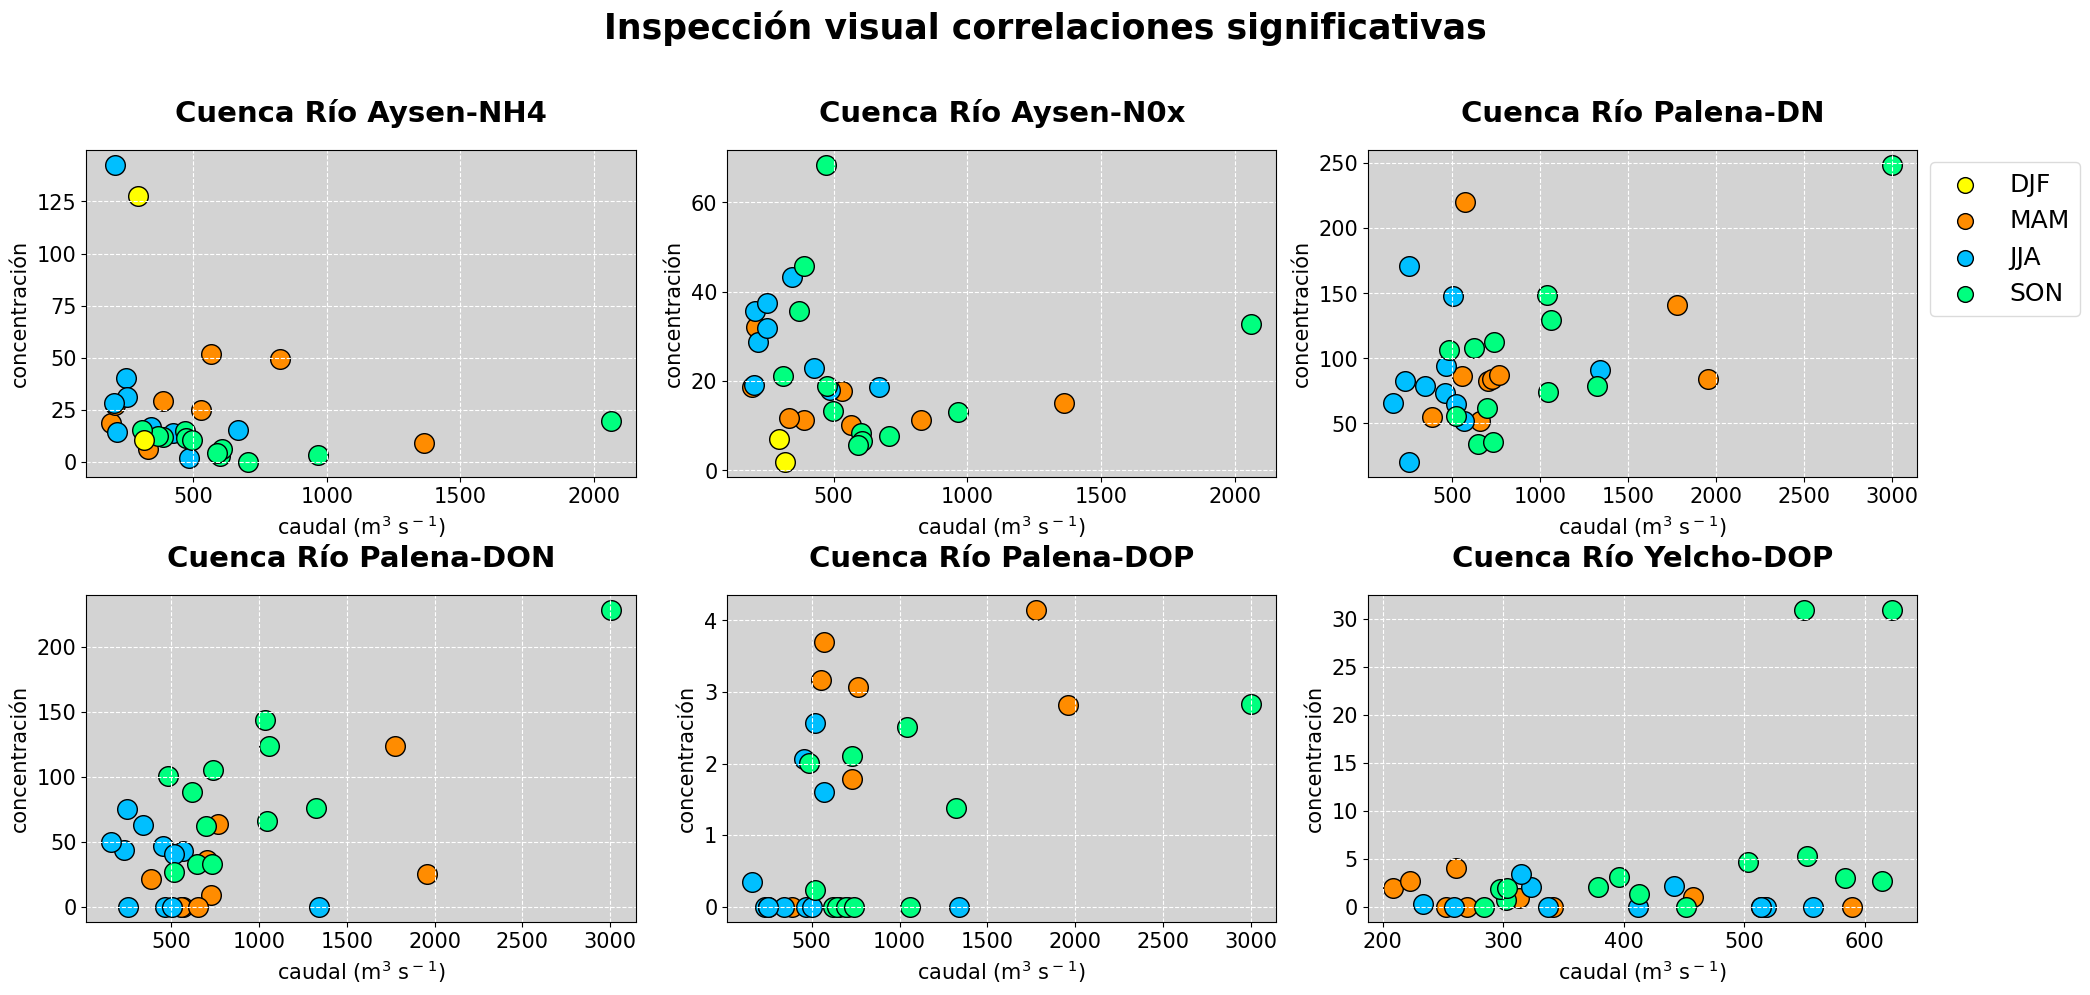

In [12]:
season_name = ['DJF','MAM','JJA','SON']

colors = ['yellow','darkorange','deepskyblue','springgreen']

# Define subplots dimensions
fig = plt.figure(figsize=(21,14))
axx = [fig.add_subplot(331),fig.add_subplot(332),fig.add_subplot(333),
       fig.add_subplot(334),fig.add_subplot(335),fig.add_subplot(336)]

for i in range(corr_summary.shape[0]):
    for x in range(len(all_c[i])):
        if pd.to_datetime(all_c[i].index[x]).month == 12 or pd.to_datetime(all_c[i].index[x]).month == 1 or pd.to_datetime(all_c[i].index[x]).month == 2: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[0],label= season_name[0])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 3 or pd.to_datetime(all_c[i].index[x]).month == 4 or pd.to_datetime(all_c[i].index[x]).month == 5: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[1],label= season_name[1])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 6 or pd.to_datetime(all_c[i].index[x]).month == 7 or pd.to_datetime(all_c[i].index[x]).month == 8: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[2],label= season_name[2])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")
        elif pd.to_datetime(all_c[i].index[x]).month == 9 or pd.to_datetime(all_c[i].index[x]).month == 10 or pd.to_datetime(all_c[i].index[x]).month == 11: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[3],label= season_name[3])#,color = colors[j],s=400,label= obs.columns[j],edgecolor="Black")

    #Label
    axx[i].set_ylabel("concentración",labelpad=5,fontsize=15)
    axx[i].set_xlabel("caudal (m$^3$ s$^-$$^1$)",labelpad=5,fontsize=15)

    #Configuration
    axx[i].set_facecolor("lightgray")
    axx[i].grid(ls="--",color="white")

    #Title
    title_name = 'Cuenca Río '+str(corr_summary.index[i])+'-'+str(corr_summary.Parámetro[i])
    axx[i].set_title(title_name,fontsize=21,pad=20,fontweight="bold")

    axx[i].tick_params(axis='y', rotation=0, labelsize=15)
    axx[i].tick_params(axis='x', rotation=0, labelsize=15)

handles, labels = axx[0].get_legend_handles_labels()
legend = axx[2].legend([handles[0],handles[1],handles[9],handles[18]], [labels[0],labels[1],labels[9],labels[18]], markerscale=0.8, loc='upper left',
                       framealpha=0.7,bbox_to_anchor=(1, 1), prop={'size': 18}) 
  
fig.set_facecolor("white")

#General configuration
plt.tight_layout()
fig.subplots_adjust(top=0.88)

fig.suptitle("Inspección visual correlaciones significativas",fontsize=25,fontweight="bold")
            
figname = '/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/FIgures/inspección_visual_v1.png'
fig.savefig(str(figname),dpi=400)
plt.show()
    

### Fitting

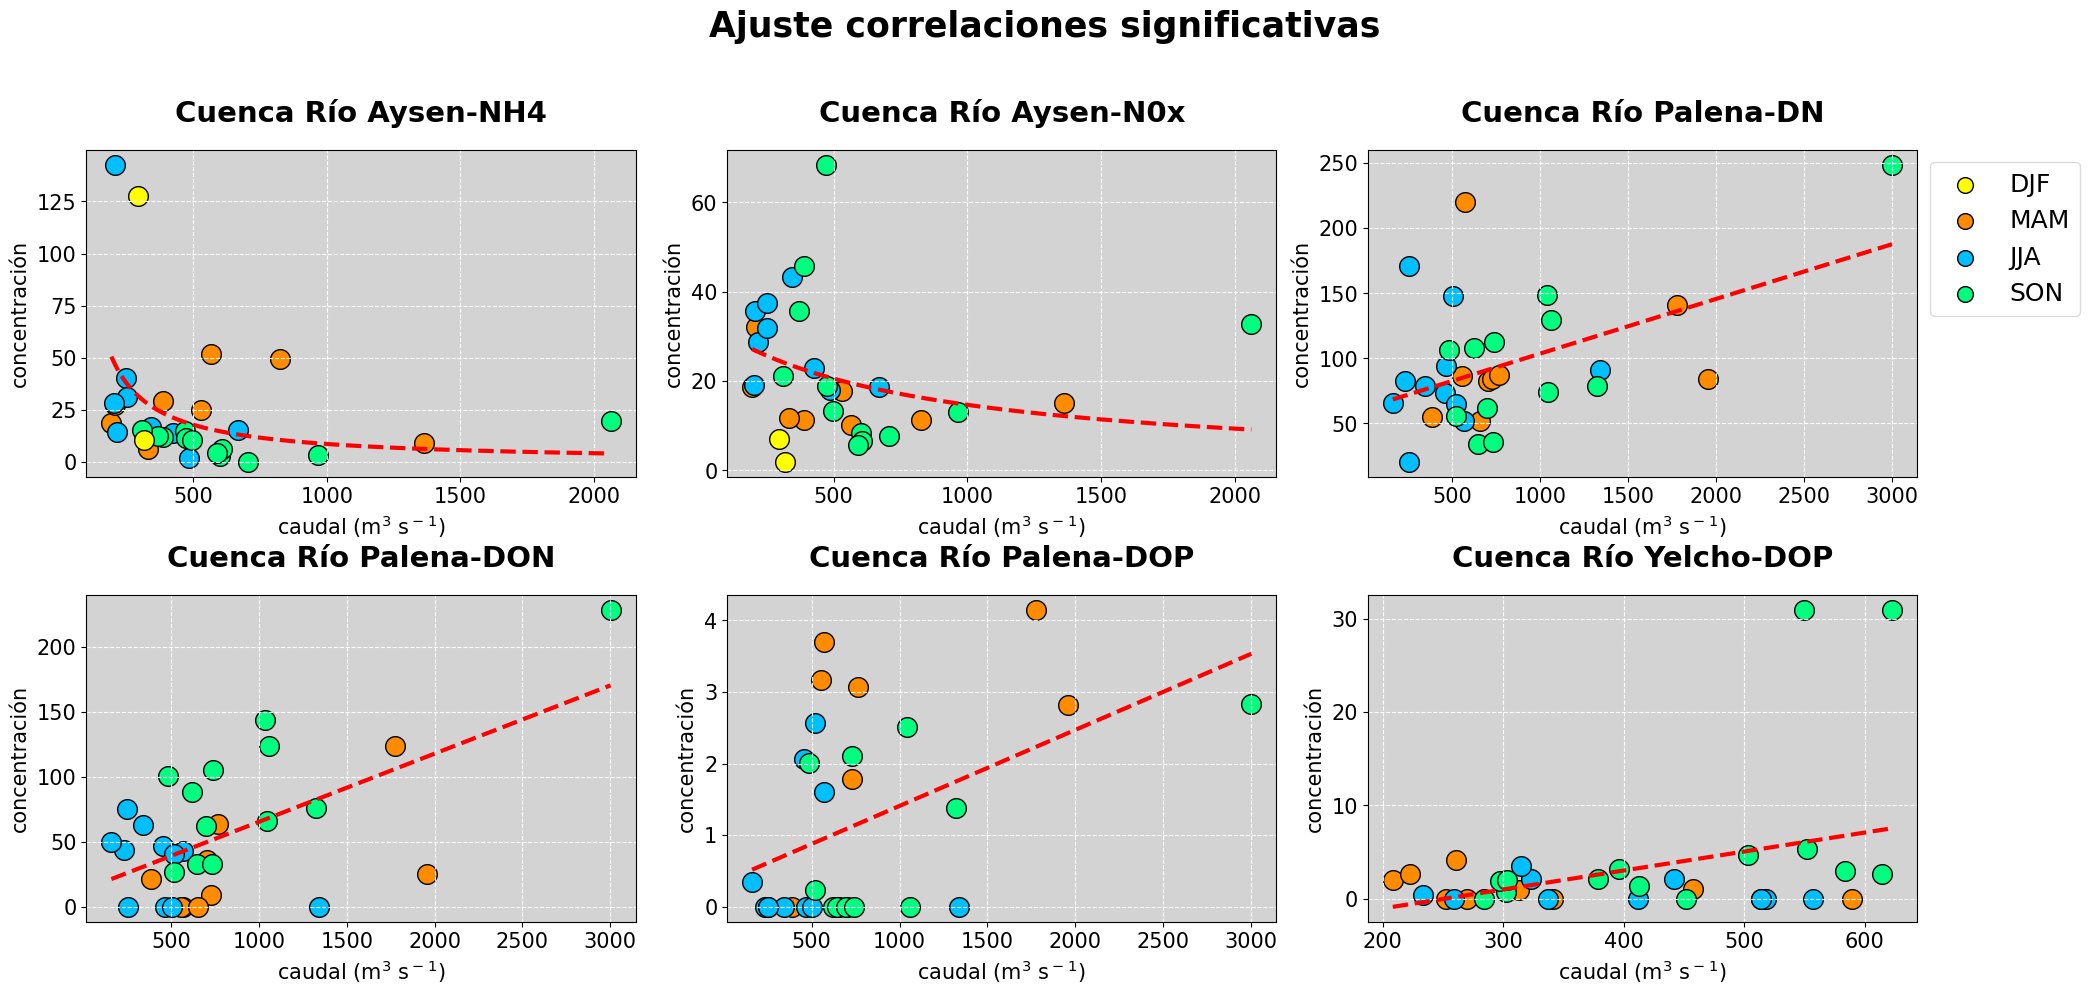

In [11]:
all_func_names = []
all_func = []
all_r2 = []

# Create function
def linear_funct(x, a, b):
    return a * x + b

def rational_funct(x, a, b, c):
    return a / (b + c*x)

season_name = ['DJF','MAM','JJA','SON']

colors = ['yellow','darkorange','deepskyblue','springgreen']

# Define subplots dimensions
fig = plt.figure(figsize=(21,14))
axx = [fig.add_subplot(331),fig.add_subplot(332),fig.add_subplot(333),
       fig.add_subplot(334),fig.add_subplot(335),fig.add_subplot(336)]

for i in range(corr_summary.shape[0]):
    for x in range(len(all_c[i])):
        if pd.to_datetime(all_c[i].index[x]).month == 12 or pd.to_datetime(all_c[i].index[x]).month == 1 or pd.to_datetime(all_c[i].index[x]).month == 2: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[0],label= season_name[0])
        elif pd.to_datetime(all_c[i].index[x]).month == 3 or pd.to_datetime(all_c[i].index[x]).month == 4 or pd.to_datetime(all_c[i].index[x]).month == 5: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[1],label= season_name[1])
        elif pd.to_datetime(all_c[i].index[x]).month == 6 or pd.to_datetime(all_c[i].index[x]).month == 7 or pd.to_datetime(all_c[i].index[x]).month == 8: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[2],label= season_name[2])
        elif pd.to_datetime(all_c[i].index[x]).month == 9 or pd.to_datetime(all_c[i].index[x]).month == 10 or pd.to_datetime(all_c[i].index[x]).month == 11: 
            axx[i].scatter(all_q[i][x],all_c[i][x],s=200,edgecolor="Black",color = colors[3],label= season_name[3])
            
    if corr_summary.Correlación[i] == 'pearson':
        #Choose the input and output variables
        x, y = all_q[i].values, all_c[i].values
        #Fitting
        a,b = curve_fit(linear_funct, x, y)[0]
        all_func_names.append('lineal')
        all_func.append('y = %.5f * x + %.5f' % (a, b))
        all_r2.append(round(r2_score(y,linear_funct(x,a,b)),3))
        
        x_line = np.arange(min(x), max(x), 1)
        # calculate the output for the range
        y_line = linear_funct(x_line, a, b)
        # create a line plot for the mapping function
        axx[i].plot(x_line, y_line, '--', color='red',linewidth=3)       
        
    elif corr_summary.Correlación[i] == 'spearman':
        # choose the input and output variables
        x, y = all_q[i].values, all_c[i].values
        #Fitting
        a,b,c = curve_fit(rational_funct, x, y)[0]
        all_func_names.append('racional')
        all_func.append('y = %.5f / (%.5f + %.5f * x)' % (a, b, c))
        all_r2.append(round(r2_score(y,rational_funct(x,a,b,c)),3))
        
        x_line = np.arange(min(x), max(x), 1)
        # calculate the output for the range
        y_line = rational_funct(x_line, a, b,c)
        # create a line plot for the mapping function
        axx[i].plot(x_line, y_line, '--', color='red',linewidth=3)  
        
    #Label
    axx[i].set_ylabel("concentración",labelpad=5,fontsize=15)
    axx[i].set_xlabel("caudal (m$^3$ s$^-$$^1$)",labelpad=5,fontsize=15)

    #Configuration
    axx[i].set_facecolor("lightgray")
    axx[i].grid(ls="--",color="white")

    #Title
    title_name = 'Cuenca Río '+str(corr_summary.index[i])+'-'+str(corr_summary.Parámetro[i])
    axx[i].set_title(title_name,fontsize=21,pad=20,fontweight="bold")

    axx[i].tick_params(axis='y', rotation=0, labelsize=15)
    axx[i].tick_params(axis='x', rotation=0, labelsize=15)

handles, labels = axx[0].get_legend_handles_labels()
legend = axx[2].legend([handles[0],handles[1],handles[9],handles[18]], [labels[0],labels[1],labels[9],labels[18]], markerscale=0.8, loc='upper left',
                       framealpha=0.7,bbox_to_anchor=(1, 1), prop={'size': 18}) 
  
fig.set_facecolor("white")

#General configuration
plt.tight_layout()
fig.subplots_adjust(top=0.88)

fig.suptitle("Ajuste correlaciones significativas",fontsize=25,fontweight="bold")
            
figname = '/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/FIgures/Ajuste_de_curvas.png'
fig.savefig(str(figname),dpi=400)
plt.show()


In [13]:
corr_summary['Función'] = all_func
corr_summary['R$^2$'] = all_r2
corr_summary.to_csv('/media/phi/Hard_disk2/Projects/Pisciculture_vs_Rivers/Entrega/Results/Resumen_final.csv')

In [6]:
corr_summary

,Parámetro,Correlación,Valor,p-value,Cantidad de datos
Cuenca,,,,,
Aysen,NH4,spearman,-0.450806,0.010922,31
Aysen,N0x,spearman,-0.388306,0.030876,31
Palena,DN,pearson,0.481939,0.005221,32
Palena,DON,pearson,0.591175,0.000367,32
Palena,DOP,pearson,0.452541,0.010583,31
Yelcho,DOP,pearson,0.363449,0.031865,35
